In [1]:
%load_ext dotenv
%dotenv

In [2]:
# %load common.py
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm import tqdm

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)


PROJECT_PATH_ROOT = os.getenv('PROJECT_PATH_ROOT')
SEED = int(os.getenv('SEED'))

DATA_PATH = os.path.join(PROJECT_PATH_ROOT, "data", "raw")

TRAIN_PATH = os.path.join(DATA_PATH, "train.xlsx")
TEST_PATH = os.path.join(DATA_PATH, "test.xlsx")

In [3]:
train = pd.read_excel(TRAIN_PATH)
test = pd.read_excel(TEST_PATH)

In [4]:
def get_text_all_category(data, category_id):
    text = " "
    category = data[data.target == category_id]
    for idx, row in tqdm(category.iterrows(), total=category.shape[0]):
        text += row['text'] + " "
    return text

def plot_category(data, category_id, figsize=(7, 5)):
    plt.figure(figsize=figsize)
    category = get_text_all_category(data, category_id)
    wordcloud = WordCloud(max_font_size=50).generate(category)
    print(f'Category: {category_id}')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [5]:
for i in range(11):
    print("Category: ", i)
    display(train[train.target == i].sample(4, random_state=SEED))
    plt.show()

Category:  0


,text,target
1879,"Здравствуйте, не работает интернет и ТВ? На роутере мигает - LOS ?",0
566,У меня не работает домашний интернет,0
1415,"Добрый день, уже полдня нет интернета и телевидения",0
2372,Здравствуйте. Не работает вай фай,0


Category:  1


,text,target
446,низкая скорость по вай фай серез роутер,1
60,скачивание 400 кб/с,1
1599,"Добрый день, очень сильно упала скорость интернет соединения",1
1072,Здравствуйте почему у меня скорость интернета максиму 90 а должна быть 200,1


Category:  2


,text,target
1259,"Здравствуйте, нужна ваша помощь в установке пароля на Wi-Fi. После последнего визита вашего специалиста (он не вернул пароль) моя сеть открыта",2
343,Добрый день. Как поменять пароль у wi-fi?,2
1201,"Здравствуйте,можно ли через приложение ростелеком на смартфоне,поменять пароль на вай фай роутере ?",2
1354,Здравствуйте. Могу ли я с помощью Вашего приложения удалённо сменить пароль от Wi-Fi?,2


Category:  3


,text,target
916,"Ребёнок уронил роутер и оборвал провод (тонкий, желтый), необходим ремонт роутера",3
840,По ходу жёлтый провод котёнок покусал,3
2173,"Нам нужен специалист что бы подключить кабель, кабель оборван. Услуги не работают.",3
1424,"Здравствуйте, кажется повредился кабель от интернета. Как оставлять заявку на починку через приложение?",3


Category:  4


,text,target
1400,Почему интернет очень плохо работает ?,4
358,Добрый день. Скажите пожалуйста что за проблемы с интернетом ежедневно раз по 5 в день пропадает интернет или же скорость падает вниз..,4
464,"Добрый день Пропало соединение, роутер перегрузил все тоже самое.",4
2142,"Добрый день. 6 и 7 июня, пропадает интернет, телевидение. Примерно с 21.00 до 23.00",4


Category:  5


,text,target
701,"Здравствуйте, как узнать пароль от вай-фая?",5
1301,"Здравствуйте! Подключили интернет,как узнать имя роутера и пароль?",5
1447,Нужно узнать пароль от моего Wi-Fi,5
1045,Какой пароль от вай фая,5


Category:  6


,text,target
332,"Здравствуйте, посмотрите пожалуйста если неполадки или оброщения других абонентов по моему местоположение. Очень плохое соединение. Низкая скорость и очень огромный пинг. Посмотрите пожалуйста",6
2138,"У меня очень сильно скачет пинг, и тормозит интернет",6
2406,"Пинг 408 скачать 0,23мб",6
413,"Здравствуйте, во время сеанса в игре Apex Legends, у меня постоянно скачет пинг 90 - 130. Что доставляет крайний дискомфорт",6


Category:  7


,text,target
1848,"Здравствуйте, я купил новый роутер, могу ли я сам его подключить и зарегистрировать?",7
518,Пропала настройка домашнего интернета,7
1315,Мне нужно настроить роутер,7
1522,Здравствуйте. Перестал работать wi-fi. В настройках wi-fi даже не показывает мою сеть,7


Category:  8


,text,target
1968,"Здравствуйте , могу ли я заменить роутер ваш на более новый , так как роутер устарел и какие то проблемы с вай фаем ?",8
338,"Требую заменить роутер так как он не обеспечивает устойчивое соединение. На телевизоре ежедневно выходит сообщение об отраженных атаках до 100 шт в день. ТВ тоже от вашей компании.Напоминаю, что роутер находится в аренде, и согласно ГК его капитальный ремонт или замена по причине его негодности осуществляется Арендодателем, то есть Ростелекомом.",8
1286,"Здравствуйте, я бы хотел поменять вай Фай роутер, так как тот, который установлен сейчас не покрывает всю площадь квартиры",8
660,"Здравствуйте, как можно сдать роутер и приставку",8


Category:  9


,text,target
792,"Добрый день ! Можно мне вызвать мастера? Никто не перезванивает и не назначает , я же деньги не просто так заплатила",9
700,"добрый день, можно вызвать мастера, пожалуйста?",9
2408,Здравствуйте. Можно вызвать мастера?,9
1068,Я хочу вызвать на завтра мастера на дом,9


Category:  10


,text,target
958,Не могу подключить робот пылесос к вай фай,10
930,Здравствуйте. Подскажите пожалуйста оказывается ли у вас услуга переноса роутера в другое место в квартире?,10
2029,"Здравствуйте, я хотел бы узнать, по какой технологии подключают интернет в дом, оптический или обычный проводной?",10
1528,Вайфай роутер,10


In [6]:
display(train[train.target == 9].sample(10, random_state=SEED))

,text,target
792,"Добрый день ! Можно мне вызвать мастера? Никто не перезванивает и не назначает , я же деньги не просто так заплатила",9
700,"добрый день, можно вызвать мастера, пожалуйста?",9
2408,Здравствуйте. Можно вызвать мастера?,9
1068,Я хочу вызвать на завтра мастера на дом,9
1004,Здравствуйте! Моя проблема с роутером до сих пор не решена! Возможно ли направить специалиста на выходных?,9
233,Здравствуйте. Хочу вызвать мастера?,9
1381,"Здравствуйте, мне нужно вызвать мастера.",9
2318,"здравствуйте, можно вызвать мастера на дом?",9
1227,"Доброй ночи. Подскажите как вызвать специалиста, чтобы переставил роутер в другое место в квартире?",9
2380,"Добрый день, оформить вызов специалиста, чтобы у меня забрали роутер с предыдущего договора. За 250₽",9


In [7]:
display(train[train.target == 10].sample(10, random_state=SEED))

,text,target
958,Не могу подключить робот пылесос к вай фай,10
930,Здравствуйте. Подскажите пожалуйста оказывается ли у вас услуга переноса роутера в другое место в квартире?,10
2029,"Здравствуйте, я хотел бы узнать, по какой технологии подключают интернет в дом, оптический или обычный проводной?",10
1528,Вайфай роутер,10
1439,Смотрим через проводную приставку,10
529,"Добрый день. Я бы хотела узнать, когда закончится аренда WiFi оборудования?",10
1712,Здравствуйте. Какая будет задержка ПИНГА ( LATENCY ) из Челябинска до Франции по Вашей линии?,10
2163,Здравствуйте. Как долго по времени создание новых портов в подьезде дома,10
1709,"Здравствуйте, у меня была опция ускорение интернета в 2 раза, я её не вижу почему.",10
2322,Здравствуйте. У меня была подключена опция ускорения скорости до 1 Гбит. Сегодня эта опция пропала,10


100%|█████████████████████████████████████████████████████████████████████████████| 432/432 [00:00<00:00, 15407.25it/s]


Category: 0


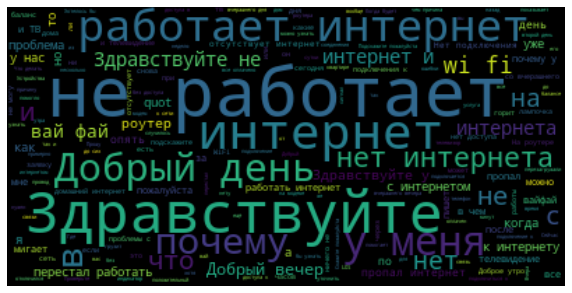

100%|██████████████████████████████████████████████████████████████████████████████| 341/341 [00:00<00:00, 8112.82it/s]


Category: 1


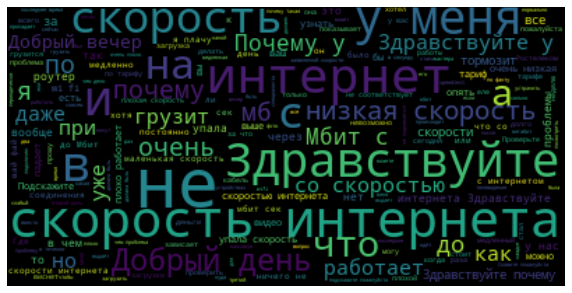

100%|█████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 10415.62it/s]


Category: 2


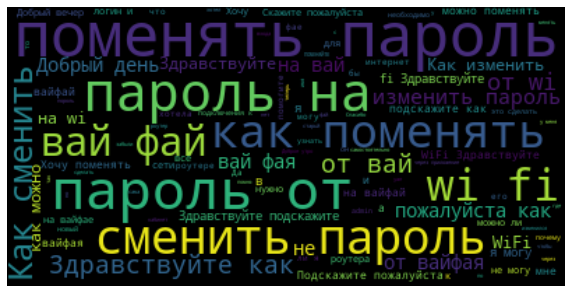

100%|██████████████████████████████████████████████████████████████████████████████| 265/265 [00:00<00:00, 9807.47it/s]


Category: 3


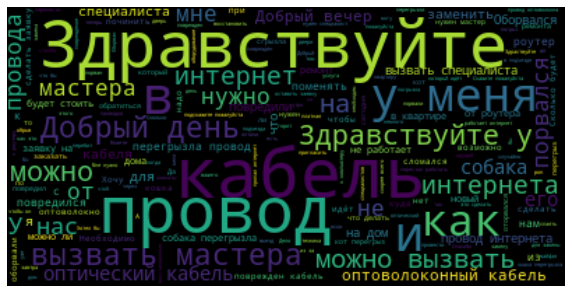

100%|█████████████████████████████████████████████████████████████████████████████| 318/318 [00:00<00:00, 10957.66it/s]


Category: 4


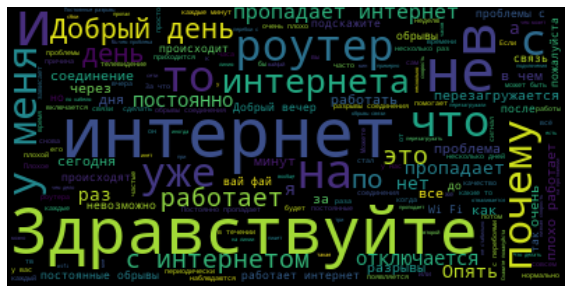

100%|██████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 8475.51it/s]


Category: 5


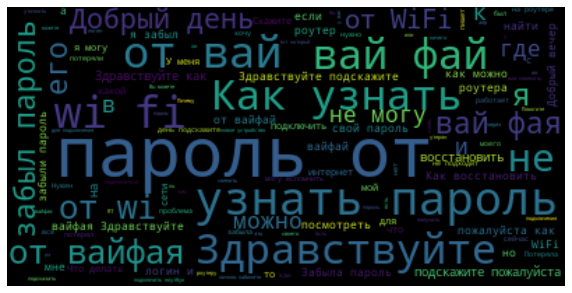

100%|█████████████████████████████████████████████████████████████████████████████| 235/235 [00:00<00:00, 16774.36it/s]


Category: 6


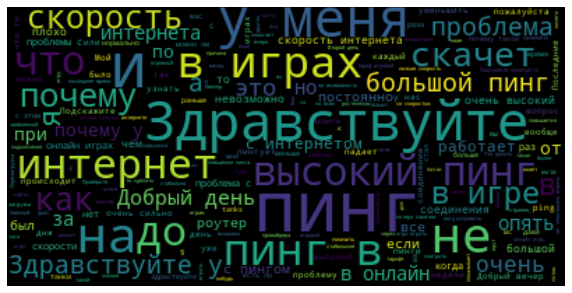

100%|█████████████████████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 17489.45it/s]


Category: 7


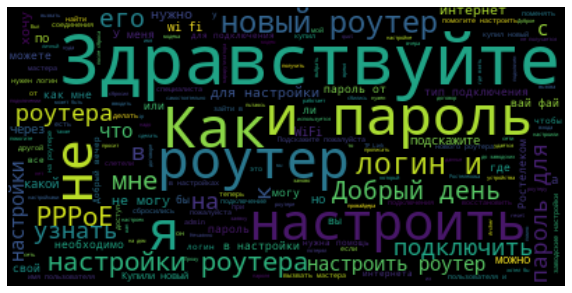

100%|████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<00:00, 7085.74it/s]


Category: 8


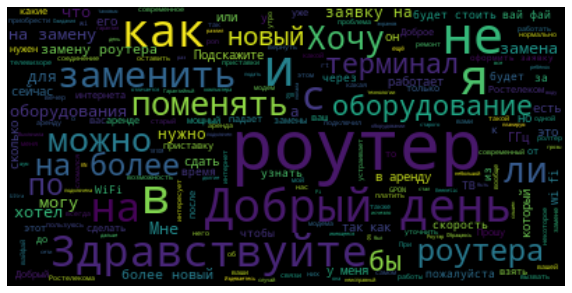

100%|████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 7397.36it/s]


Category: 9


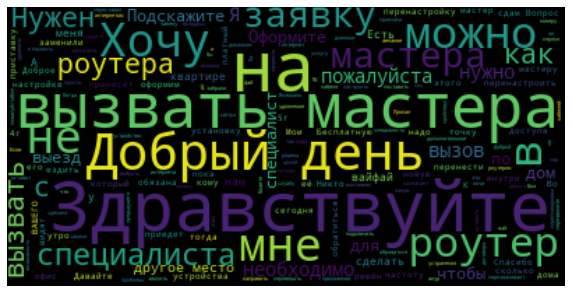

100%|████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 8660.41it/s]


Category: 10


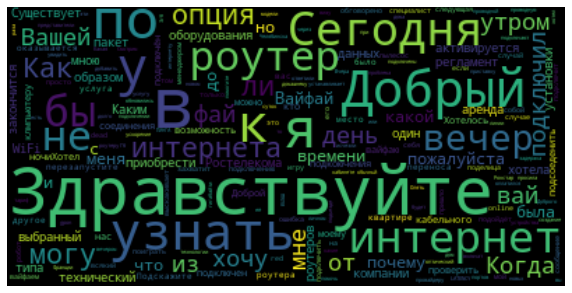

In [8]:
for i in range(11):
    plot_category(train, i, figsize=(10, 7))

# О структуре классов
* Категория 0: Отсутствие интернета

* Категория 1: Падение скорости

* Категория 2: Смена пароля

* Категория 3: Повреждение оборудования (кабеля)

* Категория 4: Пропадает интернет (соединение), телевидение

* Категория 5: Узнать пароль от Wi-Fi

* Категория 6: Большой пинг, низкая скорость

* Категория 7: Настройка роутера

* Категория 8: Заменить роутер и приставку

* Категория 9: Вызов мастера

* Категория 10: Скорее всего категория - Другое

Все интенты, которые не получилось качественно категоризовать свалили 
в одну категорию (10)

# Проблемы:

Есть близкие категории, которые характеризуются 
близкими контекстами и похожими словами: категории 1, 4, 6

Категория 9 часто без конкретной цели, не понятно для чего вызова мастера

Некоторые категории, так же содержат вызов мастера и пояснение для чего нужен мастер
Пример, категория 3
"Нам нужен специалист что бы подключить кабель, кабель оборван. Услуги не работают"

Возможно, в 9ю категорию обычно попадают интенты, которые имеют проблемы восприятием 
аппаратурой и переводом в текст.

В целом, наблюдается, что % проблем невысокий, т.к. представителей 9, 10 классов немного

# Присутствуют ошибки в тексте
* "низкая скорость по вай фай серез роутер"

# Иногда текст словно вырван из контекста
* "Вайфай роутер" 
* "Пинг 408 скачать 0,23мб"



# Иерархия классов

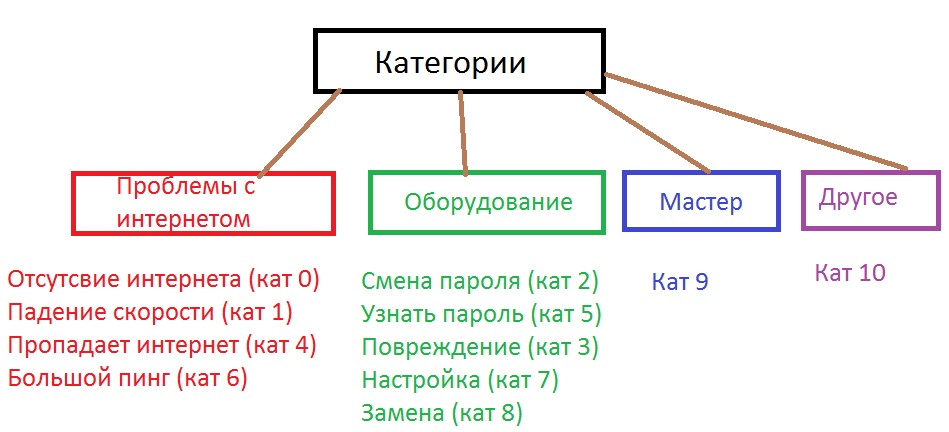

In [9]:
from IPython.display import Image
Image(filename='category_hierarchy.jpg') 

* Так как присутствуют ошибки, то хорошо подойдут модели на н-граммах
Tf-IDF, FastText
* Данных мало, маленькие тексты, скорее всего подойдут предобученные модели
* Данных мало, можно попробовать многоуровневую классификацию:
Грубым/простым классфикатором разбить на группы, которые легко разделимы
С помощью контекстуальных эмбедингов, которые хорошо улавливают смысл, уже разбивать внутри большой группы на более мелкие категории